In [27]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv('D:/606/RoadMaintenance/Datasets/FinalDataSet/Updated_FinalFilteredCombined.csv')

In [29]:
df.isna().sum()

AADT_VN              0
BEGIN_POIN           0
COUNTY_COD           0
END_POINT            0
F_SYSTEM_V           0
IRI_VN               1
IS_IMPROVED          0
ROUTE_ID             0
ROUTE_NUMB         504
SPEED_LIMI         504
THROUGH_LA           0
TRUCK_VN          6328
URBAN_CODE           0
Unnamed: 0           0
YEAR_RECOR           0
curval               0
geometry_paths       0
tmiles               0
tons                 0
value                0
dtype: int64

In [30]:
df.dtypes

AADT_VN           float64
BEGIN_POIN        float64
COUNTY_COD        float64
END_POINT         float64
F_SYSTEM_V        float64
IRI_VN            float64
IS_IMPROVED       float64
ROUTE_ID           object
ROUTE_NUMB        float64
SPEED_LIMI        float64
THROUGH_LA        float64
TRUCK_VN          float64
URBAN_CODE        float64
Unnamed: 0          int64
YEAR_RECOR          int64
curval            float64
geometry_paths     object
tmiles            float64
tons              float64
value             float64
dtype: object

In [31]:
df['IRI_VN'] = df.groupby(['ROUTE_ID', 'BEGIN_POIN'])['IRI_VN'].transform(lambda x: x.fillna(x.mean()))

In [32]:
df.isna().sum()

AADT_VN              0
BEGIN_POIN           0
COUNTY_COD           0
END_POINT            0
F_SYSTEM_V           0
IRI_VN               0
IS_IMPROVED          0
ROUTE_ID             0
ROUTE_NUMB         504
SPEED_LIMI         504
THROUGH_LA           0
TRUCK_VN          6328
URBAN_CODE           0
Unnamed: 0           0
YEAR_RECOR           0
curval               0
geometry_paths       0
tmiles               0
tons                 0
value                0
dtype: int64

In [33]:
unique_years_count = df['YEAR_RECOR'].nunique()

if unique_years_count > 1:
    
    year_speed_limit_mean = df.groupby('YEAR_RECOR')['SPEED_LIMI'].mean()

    df['SPEED_LIMI'] = df.apply(lambda row: year_speed_limit_mean[row['YEAR_RECOR']] if pd.isna(row['SPEED_LIMI']) else row['SPEED_LIMI'], axis=1)

    print(df.head())

    # Print the column name and their data types
    print(df.info())
else:
    print("The column `YEAR_RECOR` has only one unique value.")
    print("Filling missing values with the mean may lead to bias.")

   AADT_VN  BEGIN_POIN  COUNTY_COD  END_POINT  F_SYSTEM_V  IRI_VN  \
0  44290.0         5.3        97.0        5.4         1.0    44.0   
1  44750.0         5.3        97.0        5.4         1.0    48.0   
2  45760.0         5.3        97.0        5.4         1.0    80.0   
3  48670.0         5.3        97.0        5.4         1.0    43.0   
4  49080.0         5.3        97.0        5.4         1.0    39.0   

   IS_IMPROVED      ROUTE_ID  ROUTE_NUMB  SPEED_LIMI  THROUGH_LA  TRUCK_VN  \
0          0.0  IN0000100000        10.0        60.0         4.0       NaN   
1          0.0  IN0000100000        10.0        60.0         4.0       1.0   
2          0.0  IN0000100000        10.0        60.0         4.0       NaN   
3          1.0  IN0000100000        10.0        70.0         4.0       NaN   
4          1.0  IN0000100000        10.0        70.0         4.0       NaN   

   URBAN_CODE  Unnamed: 0  YEAR_RECOR      curval  \
0     99999.0         738        2013  263.516002   
1     9999

In [34]:
df.isna().sum()

AADT_VN              0
BEGIN_POIN           0
COUNTY_COD           0
END_POINT            0
F_SYSTEM_V           0
IRI_VN               0
IS_IMPROVED          0
ROUTE_ID             0
ROUTE_NUMB         504
SPEED_LIMI           0
THROUGH_LA           0
TRUCK_VN          6328
URBAN_CODE           0
Unnamed: 0           0
YEAR_RECOR           0
curval               0
geometry_paths       0
tmiles               0
tons                 0
value                0
dtype: int64

In [35]:
columnsToConvert = ['AADT_VN', 'COUNTY_COD', 'IRI_VN', 'IS_IMPROVED', 'THROUGH_LA', 'curval', 'tmiles', 'tons', 'value']

df = df.astype({col: 'int64' for col in columnsToConvert})

In [36]:
df.dtypes

AADT_VN             int64
BEGIN_POIN        float64
COUNTY_COD          int64
END_POINT         float64
F_SYSTEM_V        float64
IRI_VN              int64
IS_IMPROVED         int64
ROUTE_ID           object
ROUTE_NUMB        float64
SPEED_LIMI        float64
THROUGH_LA          int64
TRUCK_VN          float64
URBAN_CODE        float64
Unnamed: 0          int64
YEAR_RECOR          int64
curval              int64
geometry_paths     object
tmiles              int64
tons                int64
value               int64
dtype: object

AADT_VN           9
BEGIN_POIN        9
COUNTY_COD        9
END_POINT         9
F_SYSTEM_V        9
IRI_VN            9
IS_IMPROVED       9
ROUTE_ID          9
ROUTE_NUMB        8
SPEED_LIMI        9
THROUGH_LA        9
TRUCK_VN          1
URBAN_CODE        9
Unnamed: 0        9
YEAR_RECOR        9
curval            9
geometry_paths    9
tmiles            9
tons              9
value             9
dtype: int64


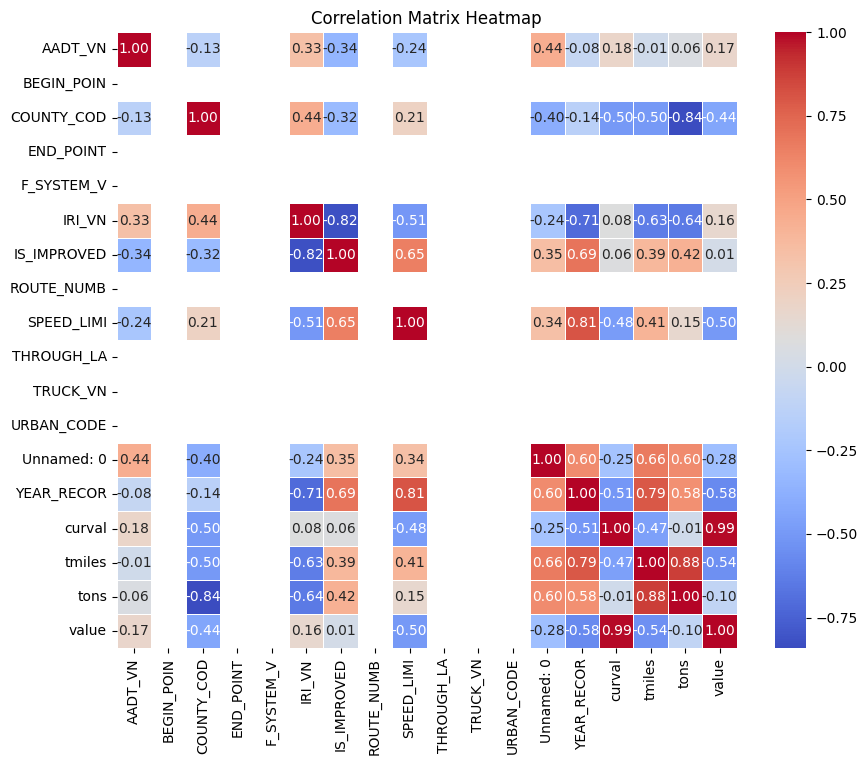

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter the data where 'begin_poin' is 317.5
filtered_df = df[(df['ROUTE_ID'] == 'IN0004590000') & (df['BEGIN_POIN'] == 1.6)]
print(filtered_df.count())

# Select only the columns with numeric (int and float) data types
numeric_df = filtered_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [38]:
numeric_df.to_csv('sample.csv')

In [39]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import numpy as np
from scipy.interpolate import interp1d

linear_df = pd.DataFrame()

start_year = 2013
end_year = 2021

# Loop through each year range
for year in range(start_year, end_year):

    years = np.linspace(year, year + 1, num=12, endpoint=False)  # Exclude exact next year to avoid duplicates
    
    linear_interp = {
        col: interp1d(numeric_df["YEAR_RECOR"], numeric_df[col], kind="linear")(years)
        for col in ["AADT_VN", "IRI_VN", "curval", "tmiles", "tons", "value"]
    }

    temp_df = pd.DataFrame(linear_interp)
    temp_df.insert(0, "YEAR_RECOR", year)  # Add the year column
    temp_df["MONTH"] = np.arange(1, 13)

    linear_df = pd.concat([linear_df, temp_df], ignore_index=True)



years_2022 = np.linspace(2020, 2022, num=12, endpoint=False)
linear_interp_2022 = {
    col: interp1d(numeric_df["YEAR_RECOR"], numeric_df[col], kind="linear")(years_2022)
    for col in ["AADT_VN", "IRI_VN", "curval", "tmiles", "tons", "value"]
}

temp_df = pd.DataFrame(linear_interp_2022)
temp_df.insert(0, "YEAR_RECOR", 2022)  # Add the year column
temp_df["MONTH"] = np.arange(1, 13)

linear_df = pd.concat([linear_df, temp_df], ignore_index=True)

linear_csv_path = "linear_interpolation.csv"
linear_df.to_csv(linear_csv_path, index=False)

print(linear_df)


     YEAR_RECOR       AADT_VN     IRI_VN       curval      tmiles     tons  \
0          2013  52730.000000  79.000000  1954.000000   81.000000  3558.00   
1          2013  52342.500000  81.416667  1971.666667   81.083333  3569.25   
2          2013  51955.000000  83.833333  1989.333333   81.166667  3580.50   
3          2013  51567.500000  86.250000  2007.000000   81.250000  3591.75   
4          2013  51180.000000  88.666667  2024.666667   81.333333  3603.00   
..          ...           ...        ...          ...         ...      ...   
103        2022  51450.333333  45.333333   633.416667  223.833333  5165.00   
104        2022  52130.666667  44.666667   667.333333  225.666667  5207.00   
105        2022  52811.000000  44.000000   701.250000  227.500000  5249.00   
106        2022  53491.333333  43.333333   735.166667  229.333333  5291.00   
107        2022  54171.666667  42.666667   769.083333  231.166667  5333.00   

           value  MONTH  
0    1946.000000      1  
1    1962.5

In [41]:
# Identify columns in df_sample but not in df_linear_interpolation
cols_to_add = filtered_df.columns.difference(linear_df.columns)

# Merge the two tables using an inner join on 'YEAR_RECOR'
merged_df = pd.merge(linear_df, filtered_df[cols_to_add.tolist() + ['YEAR_RECOR']], on='YEAR_RECOR', how='inner')

merged_df.to_csv('merged.csv')

In [42]:
columnsToConvert = ['AADT_VN', 'COUNTY_COD', 'IRI_VN', 'IS_IMPROVED', 'THROUGH_LA', 'curval', 'tmiles', 'tons', 'value']

merged_df = merged_df.astype({col: 'int64' for col in columnsToConvert})

In [43]:
df_corr = merged_df.drop(columns=['COUNTY_COD', 'Unnamed: 0'])

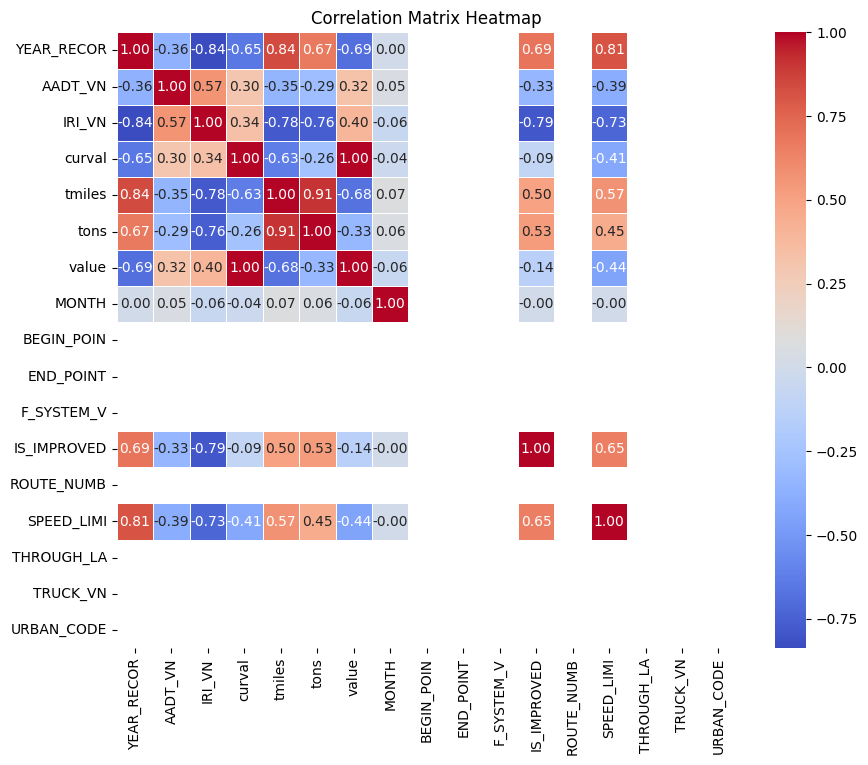

In [44]:
# Select only the columns with numeric (int and float) data types
numeric_df = df_corr.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [45]:
target_correlation = correlation_matrix['IRI_VN'].drop('IRI_VN')  # Drop self-correlation

target_correlation = target_correlation[
    (target_correlation >= 0.30) | (target_correlation <= -0.30)
]

# Display correlations
print("Correlation with IRI_VN:\n", target_correlation)

Correlation with IRI_VN:
 YEAR_RECOR    -0.837720
AADT_VN        0.566930
curval         0.338925
tmiles        -0.777173
tons          -0.762501
value          0.397273
IS_IMPROVED   -0.789334
SPEED_LIMI    -0.725550
Name: IRI_VN, dtype: float64


In [46]:
target_correlation = target_correlation.reset_index()

# Extract feature names into an array
features = target_correlation['index'].to_list()

# Print the feature names array
print("Feature Names Array:\n", features)

Feature Names Array:
 ['YEAR_RECOR', 'AADT_VN', 'curval', 'tmiles', 'tons', 'value', 'IS_IMPROVED', 'SPEED_LIMI']


In [47]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define target and features
target = 'IRI_VN'

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(df_corr[features], df_corr[target], test_size=0.2, random_state=42)

# Initialize models
linear_regressor = LinearRegression()
decision_tree_regressor = DecisionTreeRegressor()
knn_regressor = KNeighborsRegressor()

# Train models
linear_regressor.fit(X_train, y_train)
decision_tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

# Make predictions
linear_predictions = linear_regressor.predict(X_test)
tree_predictions = decision_tree_regressor.predict(X_test)
knn_predictions = knn_regressor.predict(X_test)

# Evaluate models
def evaluate_model(predictions, y_test):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

linear_mse, linear_r2 = evaluate_model(linear_predictions, y_test)
tree_mse, tree_r2 = evaluate_model(tree_predictions, y_test)
knn_mse, knn_r2 = evaluate_model(knn_predictions, y_test)

# Store results
model_evaluations = {
    "Models" : ["Linear Regression", "Decision Tree", "K-Nearest Neighbors"],
    "MSE": [linear_mse, tree_mse, knn_mse],
    "R^2": [linear_r2, tree_r2, knn_r2],
}
results_df = pd.DataFrame(model_evaluations)

# Print results
print("Supervised Learning Model Evaluations:\n")
print(results_df)

Supervised Learning Model Evaluations:

                Models         MSE       R^2
0    Linear Regression   89.009505  0.815052
1        Decision Tree   26.772727  0.944370
2  K-Nearest Neighbors  119.809091  0.751055


In [53]:
%pip install Shap

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 20.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ------------------------- -------------- 8.1/12.6 MB 38.7 MB/s eta 0:00:01
   ---------------------------------------  12.3/12.6 MB 33.5 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 24.6 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   ----------- ---------------------------- 8.4/30.3 MB 40.0 MB/s eta 0:00:01
   -------------------- ------------------- 15.7/30.3 MB 38.1 MB/s eta 0:00:01
   ------------------------------ --------- 23.1/30.3 MB 36.5 MB/s eta 0:00:01
   ---------------------------------------  30.1/30.3 MB 37.5 MB/s eta 0:00:01
   ---------------------------------------  30.1/30.

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


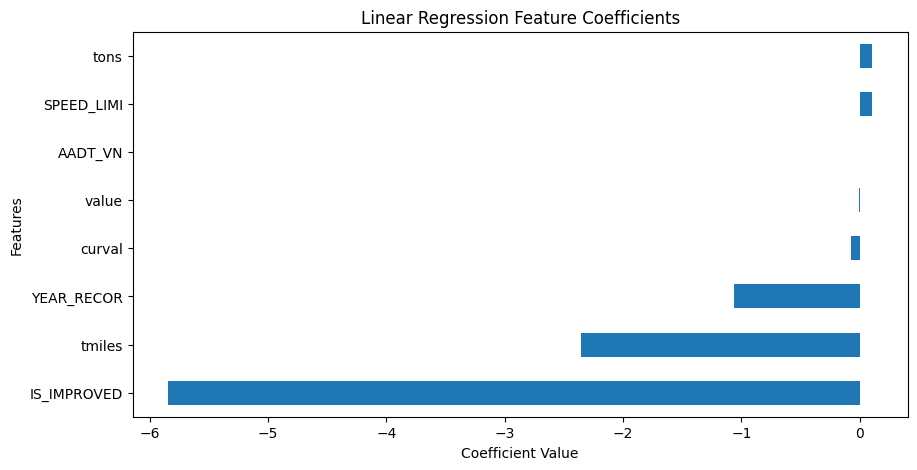

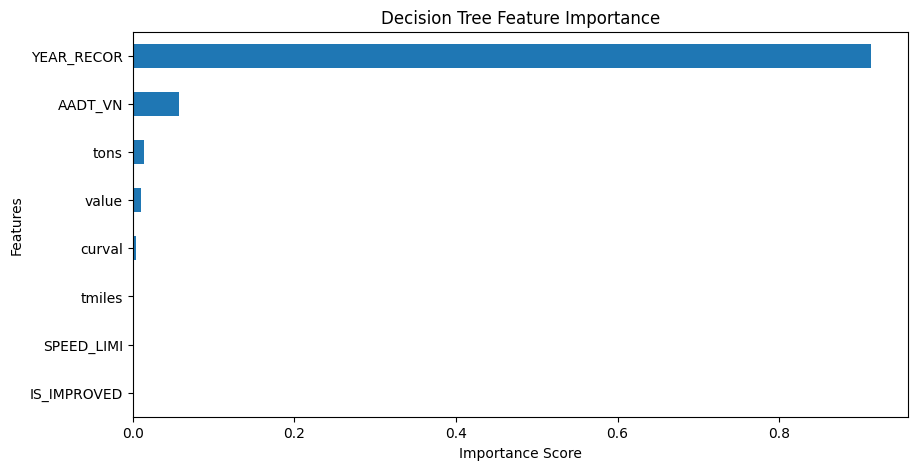

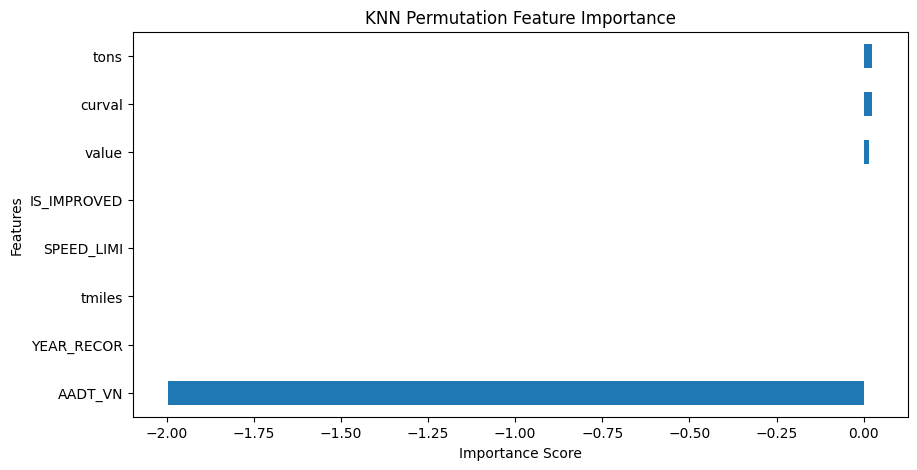

In [55]:
from sklearn.inspection import permutation_importance

# Linear Regression
plt.figure(figsize=(10, 5))
coefficients = pd.Series(linear_regressor.coef_, index=X_train.columns)
coefficients.sort_values().plot(kind='barh')
plt.title("Linear Regression Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.show()

# Decision Tree
plt.figure(figsize=(10, 5))
feature_importance = pd.Series(decision_tree_regressor.feature_importances_, index=X_train.columns)
feature_importance.sort_values().plot(kind='barh')
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# KNN Feature Importance (Permutation Importance)
perm_importance = permutation_importance(knn_regressor, X_test, y_test, n_repeats=10, random_state=42)
perm_importance_series = pd.Series(perm_importance.importances_mean, index=X_test.columns)
plt.figure(figsize=(10, 5))
perm_importance_series.sort_values().plot(kind='barh')
plt.title("KNN Permutation Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

Index(['Models', 'MSE', 'R^2'], dtype='object')


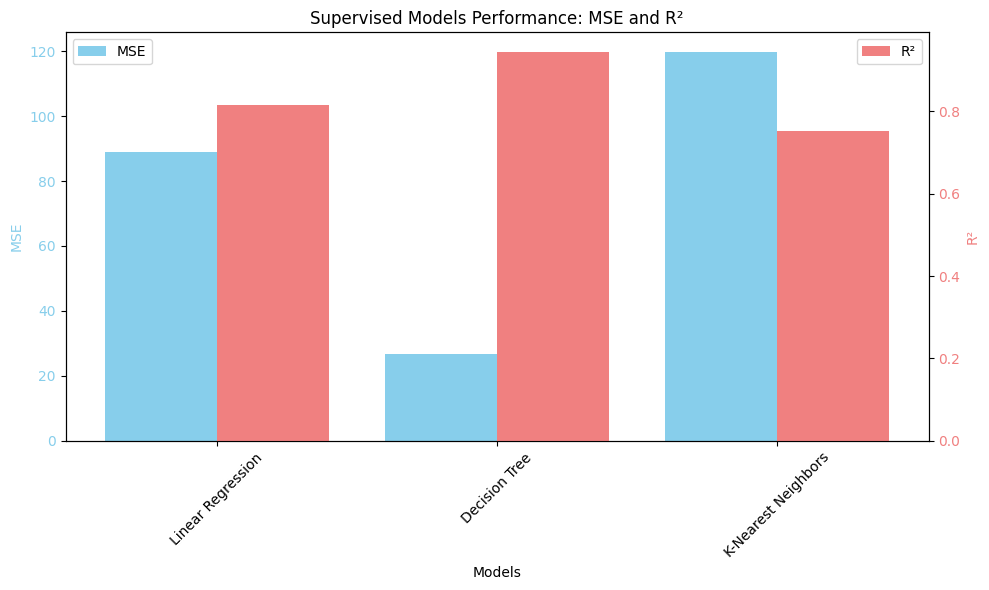

In [49]:
print(results_df.columns)
# Set positions for bars
x = np.arange(len(results_df))  # X-axis positions
width = 0.4  # Width of bars

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for MSE (left y-axis)
ax1.bar(x - width/2, results_df["MSE"], width, color='skyblue', label="MSE")
ax1.set_xlabel("Models")
ax1.set_ylabel("MSE", color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for R²
ax2 = ax1.twinx()
ax2.bar(x + width/2, results_df["R^2"], width, color='lightcoral', label="R²")
ax2.set_ylabel("R²", color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')

# Set x-axis labels and title
ax1.set_xticks(x)
ax1.set_xticklabels(results_df["Models"], rotation=45)
plt.title("Supervised Models Performance: MSE and R²")

# Add legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

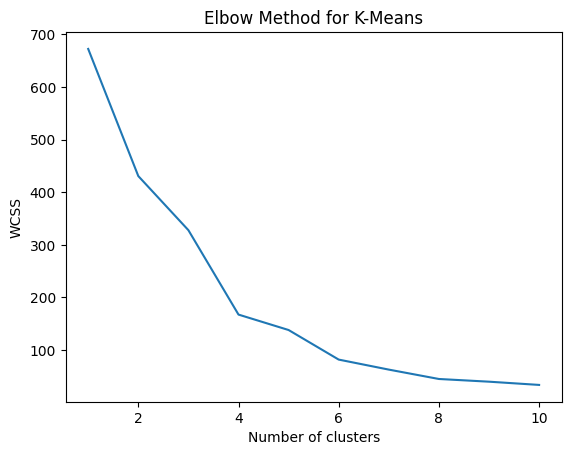

Explained Variance for 2 components: 0.7035779276776983


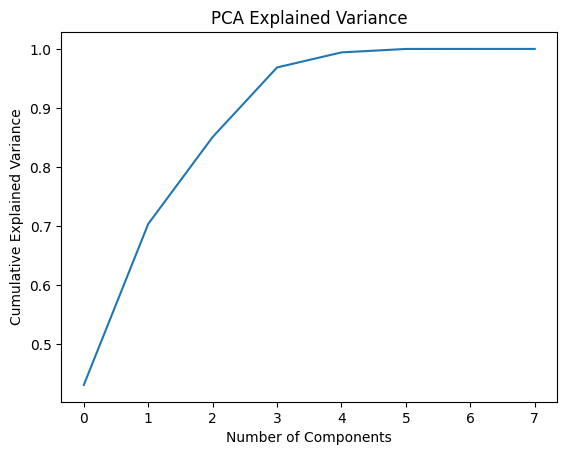

Optimal number of components for 90% variance: 4

Final Assessment Results:

K-Means Clustering (Optimal Clusters: 4):
  Silhouette Score: 0.5271596954374387

Hierarchical Clustering (Optimal Clusters: 3):
  Silhouette Score: 0.45901906416106264

DBSCAN Clustering:
  Silhouette Score: 0.24390522112299626

HDBSCAN Clustering:
  Silhouette Score: 0.467754614327772

PCA (Optimal Components for 90% Variance: 4):
  Explained Variance Ratio: 0.9686251073831798


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Read the CSV file into a DataFrame
df = pd.read_csv('merged.csv')

train_df = df_corr[df_corr['YEAR_RECOR'].between(2013, 2019)]
test_df = df_corr[df_corr['YEAR_RECOR'].isin([2020, 2022])].copy()

# Define target and features
target = 'IRI_VN'

# Prepare data for unsupervised learning
X_train = train_df[features].fillna(train_df[features].mean())  # Impute missing values for training
X_test = test_df[features].fillna(test_df[features].mean())    # Impute missing values for testing
y_test = test_df[target]

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Optimal Clusters using Elbow Method

# K-Means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the plot (you'll need to inspect it), choose the optimal number of clusters
optimal_kmeans_clusters = 4  # Replace with the optimal number you find
kmeans = KMeans(n_clusters=optimal_kmeans_clusters, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X_train_scaled)

# Hierarchical
# For Hierarchical, we don't have a direct elbow method, but for consistency,
# we'll use the same optimal number of clusters as K-Means in this example
# In practice, you might use dendrogram analysis to determine this.
optimal_hierarchical_clusters = 3  # Replace if needed
hierarchical = AgglomerativeClustering(n_clusters=optimal_hierarchical_clusters)
hierarchical_labels = hierarchical.fit_predict(X_train_scaled)

# 2. DBSCAN and HDBSCAN (no "optimal clusters" selection needed)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_train_scaled)

hdbscan = HDBSCAN(min_cluster_size=5)
hdbscan_labels = hdbscan.fit_predict(X_train_scaled)

# 3. PCA Variance Analysis
pca = PCA(n_components=2)
pca.fit(X_train_scaled)

explained_variance_2 = np.sum(pca.explained_variance_ratio_)
print(f"Explained Variance for 2 components: {explained_variance_2}")

# Increase components to find better variance
pca_full = PCA()
pca_full.fit(X_train_scaled)
explained_variance_ratio_cumulative = np.cumsum(pca_full.explained_variance_ratio_)

plt.plot(explained_variance_ratio_cumulative)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()

# Choose the number of components that explain a sufficient amount of variance (e.g., 90%)
n_components_optimal = np.argmax(explained_variance_ratio_cumulative >= 0.90) + 1
print(f"Optimal number of components for 90% variance: {n_components_optimal}")

pca_optimal = PCA(n_components=n_components_optimal)
pca_optimal.fit(X_train_scaled)
explained_variance_optimal = np.sum(pca_optimal.explained_variance_ratio_)

# 4. Evaluate Clustering Models
def evaluate_clustering(labels, X):
    if len(set(labels)) > 1:
        silhouette = silhouette_score(X, labels)
    else:
        silhouette = np.nan  # Silhouette score is not defined for single cluster
    return silhouette

kmeans_silhouette = evaluate_clustering(kmeans_labels, X_train_scaled)
hierarchical_silhouette = evaluate_clustering(hierarchical_labels, X_train_scaled)
dbscan_silhouette = evaluate_clustering(dbscan_labels, X_train_scaled)
hdbscan_silhouette = evaluate_clustering(hdbscan_labels, X_train_scaled)

# 5. Final Assessment Results (Excluding NMF)
print("\nFinal Assessment Results:\n")
print(f"K-Means Clustering (Optimal Clusters: {optimal_kmeans_clusters}):")
print(f"  Silhouette Score: {kmeans_silhouette}")

print(f"\nHierarchical Clustering (Optimal Clusters: {optimal_hierarchical_clusters}):")
print(f"  Silhouette Score: {hierarchical_silhouette}")

print(f"\nDBSCAN Clustering:")
print(f"  Silhouette Score: {dbscan_silhouette}")

print(f"\nHDBSCAN Clustering:")
print(f"  Silhouette Score: {hdbscan_silhouette}")

print(f"\nPCA (Optimal Components for 90% Variance: {n_components_optimal}):")
print(f"  Explained Variance Ratio: {explained_variance_optimal}")